#### =========================
#### MIGUEL DOMINGUEZ
#### CSC 59929
#### Machine Learning
#### Prof. Erik K. Grimmelmann
#### Date: 10/15/17
#### Homework Week 7
#### =========================

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator 
from matplotlib.colors import ListedColormap
from IPython.display import Image
%matplotlib inline
import graphviz 
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [59]:
#Obtain Iris Dataset and save it to a Pandas Frame
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#Rename columns
new_columns = ['Sepal Length [0]', 'Sepal Width [1]', 'Petal Length [2]', 'Petal Width [3]','Class']
iris.columns = new_columns
iris.head()

,Sepal Length [0],Sepal Width [1],Petal Length [2],Petal Width [3],Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
#We use all 3 flower clases (SVV means Setosa & Versicolor & Virginica)
SVV = iris.iloc[:,:].values

#Standardize the features
for i in range(0,4):
    SVV[:,i] = (SVV[:,i] - SVV[:,i].mean()) / SVV[:,i].std()   

#Samples    
X = SVV[:,0:4]    

#Get class vector
Y = SVV[:,4]
for i in range(0,len(Y)):
    if Y[i] == 'Iris-setosa':
        Y[i] = 0
    elif Y[i] == 'Iris-versicolor':
         Y[i] = 1
    else:
         Y[i] = 2
#Convert Y to list
Y = Y.tolist()

In [72]:
# Split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
         X, Y, test_size=0.50, random_state=0)

In [73]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, Y_train)

    X_combined = np.vstack((X_train, X_test))
    Y_combined = np.hstack((Y_train, Y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X_train,Y_train)
    Errors[i,1] = 1 - tree.score(X_test,Y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.266666666667 0.4
2 0.0266666666667 0.106666666667
3 0.0133333333333 0.04
4 0.0 0.04
5 0.0 0.04


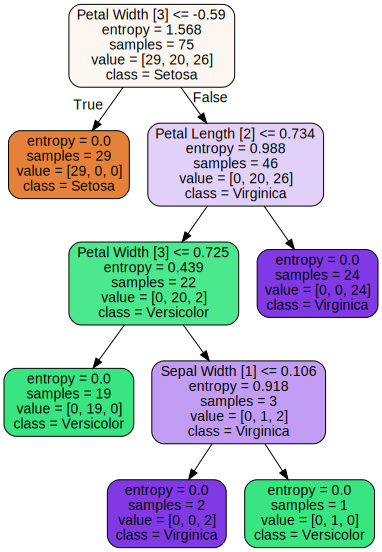

In [74]:
#Plot the final decision gree
export_graphviz(tree, out_file='T10.dot',filled= True, class_names=['Setosa','Versicolor','Virginica'],  rounded=True, 
                feature_names=['Sepal Length [0]', 'Sepal Width [1]', 'Petal Length [2]', 'Petal Width [3]'])
with open('T10.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [75]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, Y_train)

    X_combined = np.vstack((X_train, X_test))
    Y_combined = np.hstack((Y_train, Y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X_train,Y_train)
    Errors[i,1] = 1 - tree.score(X_test,Y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.266666666667 0.4
2 0.0266666666667 0.106666666667
3 0.0133333333333 0.04
4 0.0 0.04
5 0.0 0.04


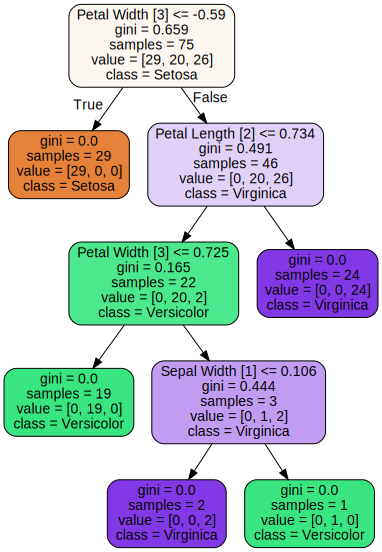

In [76]:
#Plot the final decision gree
export_graphviz(tree, out_file='T11.dot', filled= True, class_names=['Setosa','Versicolor','Virginica'],  rounded=True, 
                feature_names=['Sepal Length [0]', 'Sepal Width [1]', 'Petal Length [2]', 'Petal Width [3]'])
with open('T11.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [77]:
def classification_error(p):
       return 1 - np.max([p, 1 - p])

In [78]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, Y_train)

    X_combined = np.vstack((X_train, X_test))
    Y_combined = np.hstack((Y_train, Y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X_train,Y_train)
    Errors[i,1] = 1 - tree.score(X_test,Y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.266666666667 0.4
2 0.0266666666667 0.106666666667
3 0.0133333333333 0.04
4 0.0 0.04
5 0.0 0.04
